#Analysis of Cancer Gene Expression Data

#####Python main module imports for data analysis

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Preprocessing Imports
from sklearn.preprocessing import normalize

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix

# For Spectral Clustering algorithms
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph

# network imports
import networkx as nx
import igraph as ig

Couldn't import dot_parser, loading of dot files will not be possible.


###Data Cleaning

#####Choose the data set:

In [2]:
# read data file
chooseData = raw_input("enter 'b' for breast cancer, 'l' for lynphoma cancer, or 'p' for prostate cancer: ")

if chooseData == 'b':
    datafile = '~/Documents/THESIS/data/ICOS_DATA/breast_preprocessed.txt'
elif chooseData == 'l':
    datafile = '~/Documents/THESIS/data/ICOS_DATA/dlbcl_preprocessed.txt'
else:
    datafile = '~/Documents/THESIS/data/ICOS_DATA/prostate_preprocessed.txt'

data = pd.read_table(datafile, delim_whitespace = True, 
                     dtype={'a': np.float64}, header = None)

enter 'b' for breast cancer, 'l' for lynphoma cancer, or 'p' for prostate cancer: l


In [3]:
# data dimension
print data.shape
# last 5 rows of the data
data.tail()

(2648, 78)


,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
2643,Z84721_cds2_at,905.578221,3936.153114,1319.648120,2064.441780,954.599133,766.040336,1223.632838,895.526348,1165.567643,...,1291.666915,869.773220,1208.808797,1122.836763,2773.636510,969.386619,1147.144259,3155.294621,964.280525,1164.746332
2644,Z96810_at,580.771046,472.418714,583.712057,449.752520,507.218794,528.342437,653.004285,502.241450,484.675303,...,575.437309,560.242917,485.169986,1571.594285,635.924068,652.320983,538.414956,468.296912,659.021178,475.584991
2645,Z97054_xpt2_at,955.626595,1272.108045,791.795105,1373.169909,1757.786262,1008.492248,764.477007,1215.768535,1253.984350,...,1591.234477,851.850369,918.785194,1997.945700,1317.514201,952.216022,1063.618712,1307.294600,853.967632,720.107842
2646,Z97074_at,707.119503,783.978554,748.638380,967.288647,904.119880,590.276417,727.140558,1167.820219,883.221908,...,699.628686,665.740927,1075.546688,1199.826348,1024.971307,1394.317578,716.939115,771.630292,734.264437,741.942475
2647,ydlbcl,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# extract colum names (all but last one are gene names).
colNames = data[0]
colNames = list(colNames)

In [5]:
# housekeepnig genes
hkfile = 'HK_exons.csv'

hkdata = pd.read_csv(hkfile)

hkdata.head()

hknames = hkdata['Gene Name']

hknames.head()


0    ACADVL
1    ACADVL
2    ACADVL
3    ACADVL
4    ACADVL
Name: Gene Name, dtype: object

In [6]:
len(hkdata)

65692

In [7]:
sum(hknames.isin(colNames))

0

In [8]:
# tranpose the data to have genes as columns and microarray experiment as rows
data2 = data.T.ix[1:]
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647
1,766.6414,555.7206,691.2145,541.3077,1071.147,792.3856,619.7811,1025.738,2779.694,1700.877,...,530.9355,792.3869,943.0226,2015.213,1543.698,905.5782,580.771,955.6266,707.1195,1
2,773.8651,422.7328,856.9154,499.5031,1011.28,617.5077,505.8217,655.5362,1843.701,766.0599,...,343.394,645.7257,974.0325,1616.649,949.9221,3936.153,472.4187,1272.108,783.9786,1
3,1405.578,600.1598,694.4165,603.8363,1044.097,967.313,717.9104,721.0282,2703.724,867.7278,...,448.7603,828.5946,1050.968,1709.783,1332.656,1319.648,583.7121,791.7951,748.6384,1
4,998.3683,454.3518,761.4268,430.8263,1374.274,988.8996,826.6923,594.6524,2135.67,630.3074,...,452.216,822.799,1415.209,1928.461,1243.863,2064.442,449.7525,1373.17,967.2886,1
5,1196.41,837.2247,1037.254,839.5753,1494.959,1017.31,810.9607,1761.303,2476.553,1837.374,...,390.9081,638.8254,1304.755,1538.823,1568.696,954.5991,507.2188,1757.786,904.1199,1


In [9]:
# reset the index to satrt at 0
data2 = data2.reset_index(drop=True)
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647
0,766.6414,555.7206,691.2145,541.3077,1071.147,792.3856,619.7811,1025.738,2779.694,1700.877,...,530.9355,792.3869,943.0226,2015.213,1543.698,905.5782,580.771,955.6266,707.1195,1
1,773.8651,422.7328,856.9154,499.5031,1011.28,617.5077,505.8217,655.5362,1843.701,766.0599,...,343.394,645.7257,974.0325,1616.649,949.9221,3936.153,472.4187,1272.108,783.9786,1
2,1405.578,600.1598,694.4165,603.8363,1044.097,967.313,717.9104,721.0282,2703.724,867.7278,...,448.7603,828.5946,1050.968,1709.783,1332.656,1319.648,583.7121,791.7951,748.6384,1
3,998.3683,454.3518,761.4268,430.8263,1374.274,988.8996,826.6923,594.6524,2135.67,630.3074,...,452.216,822.799,1415.209,1928.461,1243.863,2064.442,449.7525,1373.17,967.2886,1
4,1196.41,837.2247,1037.254,839.5753,1494.959,1017.31,810.9607,1761.303,2476.553,1837.374,...,390.9081,638.8254,1304.755,1538.823,1568.696,954.5991,507.2188,1757.786,904.1199,1


In [10]:
# add colum labels
data2.columns=colNames
data2.head()

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000462_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,...,Z78290_at,Z78291_at,Z80780_f_at,Z83336_at,Z84497_s_at,Z84721_cds2_at,Z96810_at,Z97054_xpt2_at,Z97074_at,ydlbcl
0,766.6414,555.7206,691.2145,541.3077,1071.147,792.3856,619.7811,1025.738,2779.694,1700.877,...,530.9355,792.3869,943.0226,2015.213,1543.698,905.5782,580.771,955.6266,707.1195,1
1,773.8651,422.7328,856.9154,499.5031,1011.28,617.5077,505.8217,655.5362,1843.701,766.0599,...,343.394,645.7257,974.0325,1616.649,949.9221,3936.153,472.4187,1272.108,783.9786,1
2,1405.578,600.1598,694.4165,603.8363,1044.097,967.313,717.9104,721.0282,2703.724,867.7278,...,448.7603,828.5946,1050.968,1709.783,1332.656,1319.648,583.7121,791.7951,748.6384,1
3,998.3683,454.3518,761.4268,430.8263,1374.274,988.8996,826.6923,594.6524,2135.67,630.3074,...,452.216,822.799,1415.209,1928.461,1243.863,2064.442,449.7525,1373.17,967.2886,1
4,1196.41,837.2247,1037.254,839.5753,1494.959,1017.31,810.9607,1761.303,2476.553,1837.374,...,390.9081,638.8254,1304.755,1538.823,1568.696,954.5991,507.2188,1757.786,904.1199,1


In [11]:
# create date set with genes only. This is the features matrix
X = data2[range(data.shape[0]-1)]
print X.shape
# make sure data type is float and not string.
X = X.astype(float)
X.head()

(77, 2647)


,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000462_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,...,Z78289_at,Z78290_at,Z78291_at,Z80780_f_at,Z83336_at,Z84497_s_at,Z84721_cds2_at,Z96810_at,Z97054_xpt2_at,Z97074_at
0,766.641438,555.720641,691.214533,541.307724,1071.146880,792.385579,619.781103,1025.738198,2779.694245,1700.876595,...,587.049163,530.935458,792.386891,943.022578,2015.213350,1543.697899,905.578221,580.771046,955.626595,707.119503
1,773.865121,422.732757,856.915398,499.503064,1011.280030,617.507703,505.821700,655.536193,1843.701009,766.059861,...,509.485325,343.393956,645.725704,974.032487,1616.648782,949.922140,3936.153114,472.418714,1272.108045,783.978554
2,1405.578179,600.159750,694.416481,603.836309,1044.097223,967.313015,717.910395,721.028208,2703.723537,867.727801,...,563.375989,448.760272,828.594555,1050.967660,1709.782968,1332.655612,1319.648120,583.712057,791.795105,748.638380
3,998.368321,454.351773,761.426765,430.826342,1374.274472,988.899602,826.692306,594.652405,2135.669535,630.307428,...,692.521354,452.216029,822.799023,1415.209203,1928.461252,1243.863285,2064.441780,449.752520,1373.169909,967.288647
4,1196.410368,837.224699,1037.254172,839.575270,1494.958842,1017.309575,810.960716,1761.303323,2476.553302,1837.374065,...,492.970818,390.908109,638.825418,1304.754746,1538.822713,1568.696006,954.599133,507.218794,1757.786262,904.119880


In [12]:
# store the gene names/ids
geneNames = X.columns

In [13]:

# create vector with response variable
Y = data2[[-1]]
Y.head().dtypes

ydlbcl    object
dtype: object

In [14]:
# make sure response vector is binary 0, 1.
Y = pd.get_dummies(Y)
Y.head(6)

,ydlbcl_0.0,ydlbcl_1.0
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


In [15]:
# choose one of the equivalent response vectors.
Y = Y.ix[:,0]

In [16]:
np.mean(Y)

0.24675324675324675

In [17]:
Y = np.ravel(Y)

In [18]:
# model definition
chooseModel = raw_input('enter l for a logistic model with L1 reg., or e for elastic reg, or r for randomized model.: ')

if chooseModel == 'l':
    # l1 penalized logistic model
    log_model = LogisticRegression(C = 0.5, penalty = 'l1', dual = False, 
                                   fit_intercept = True)
elif chooseModel == 'e':
    # logistic regression with elasticnet regularization
    # l1_ratio refers to alpha and alpha refers to lamba in Hastie
    log_model = SGDClassifier(loss = 'log', penalty = 'elasticnet', alpha = 0.175, 
                                l1_ratio = 0.5, fit_intercept = True)
else:
    # randomized logistic regression
    log_model = RandomizedLogisticRegression(C = 200, fit_intercept=True)

enter l for a logistic model with L1 reg., or e for elastic reg, or r for randomized model.: e


In [27]:
# feature selection
X_sel = log_model.fit_transform(X,Y)
X_sel.shape

(77, 693)

In [28]:
if chooseModel == 'l' or chooseModel == 'e':
    # these are the index of the features selected by the l1 regularized logistic model
    feature_index = np.where(log_model.coef_!=0)[-1]
else:
    # these are the index of the features selected by the randomized logistic model
    feature_index = np.where(log_model.get_support() == True)
    
    
    # need to figure out how to extract the indices of relevant features using the elasticnet model

In [29]:
log_model.coef_

array([[  44.53674659,  126.05467355, -254.78955163, ...,   43.00353162,
         -20.34899252,   25.63260196]])

In [30]:
#log_model.coef_[:,feature_index];

##Why selected 181 genes is more than the number of samples? Feature extraction needs to happen on  cross-validation.

In [31]:
feature_labels = DataFrame(geneNames)
feature_labels.columns = ['Relevant Genes']
print len(feature_labels.loc[feature_index])
feature_labels.loc[feature_index]

2623


,Relevant Genes
0,A28102_at
1,AB000114_at
2,AB000115_at
3,AB000220_at
4,AB000409_at
5,AB000462_at
6,AB000905_at
7,AB001106_at
8,AB001325_at
9,AB002314_at


In [32]:
if chooseModel == 'l' or chooseModel == 'e':
    log_model.fit(X_sel,Y)
    log_model.score(X_sel,Y)

In [33]:
if chooseModel == 'l' or chooseModel == 'e':
    class_prob = log_model.predict_proba(X_sel)

In [34]:
if chooseModel == 'l' or chooseModel == 'e':
    class_prob.shape

In [35]:
if chooseModel == 'l' or chooseModel == 'e':
    dfprob = DataFrame(class_prob)
    dfprob.mean()

##Cross Validation

In [36]:
# Make a new log_model
#log_model2 = LogisticRegression()
log_model2 = LogisticRegression(dual = False, fit_intercept = True)

xvalacc = []
xvalROC = []
M = 1000

for i in range(M):

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y)

    # Now fit the new model
    log_model2.fit(X_train, Y_train)

    # Predict the classes of the testing data set
    class_predict = log_model2.predict(X_test)

    # Compare the predicted classes to the actual test classes
    xvalacc.append(metrics.accuracy_score(Y_test,class_predict))
    try:
        xvalROC.append(roc_auc_score(Y_test,class_predict))
    except ValueError:
        pass

In [37]:
np.std(xvalacc)

0.046139354135054808

In [38]:
np.mean(xvalacc)

0.94539999999999991

In [39]:
np.std(xvalROC)

0.073453915297374509

In [40]:
np.mean(xvalROC)

0.93013594193504756

In [41]:
#Y_test = np.ones(20)
Y_test

array([ 1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [42]:
class_predict

array([ 1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.])

In [43]:
roc_auc_score(Y_test,class_predict)

0.9642857142857143

In [44]:
confusion_matrix(Y_test,class_predict)

array([[13,  1],
       [ 0,  6]])

In [45]:
np.cov(X_sel)

array([[ 17870717.96045525,  14196399.51554794,   9004238.1186709 , ...,
         14167562.64143242,  14322895.42220946,  15065283.00993499],
       [ 14196399.51554794,  19770401.85042563,   9621707.12536272, ...,
         11958135.94214073,  11713489.21776752,  12155211.25155799],
       [  9004238.1186709 ,   9621707.12536272,   9820803.92624385, ...,
          9004914.0568588 ,   8312047.57673643,   8450384.77437363],
       ..., 
       [ 14167562.64143242,  11958135.94214073,   9004914.0568588 , ...,
         15924159.12866785,  14306381.34028045,  15031600.2369615 ],
       [ 14322895.42220946,  11713489.21776752,   8312047.57673643, ...,
         14306381.34028045,  14780446.22869019,  14819320.65676864],
       [ 15065283.00993499,  12155211.25155799,   8450384.77437363, ...,
         15031600.2369615 ,  14819320.65676864,  16317806.28776451]])

#Spectral Clustering

In [46]:
from sklearn.cluster import SpectralClustering
import matplotlib.cm as cm

In [47]:
spclus = SpectralClustering(affinity='nearest_neighbors', n_neighbors=20, n_clusters=2, assign_labels='discretize')
spclus_pred = spclus.fit_predict(X_sel.T)
print spclus_pred[:100]

[0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1]


In [48]:
spclus_pred.shape

(693,)

####Need to create adjecency matrix.

In [49]:
W = kneighbors_graph(X_sel.T, 20, include_self=True)
print W[0]
print type(W)
print W.shape
print(W.todense)

  (0, 0)	1.0
  (0, 5)	1.0
  (0, 157)	1.0
  (0, 595)	1.0
  (0, 637)	1.0
  (0, 635)	1.0
  (0, 535)	1.0
  (0, 50)	1.0
  (0, 371)	1.0
  (0, 360)	1.0
  (0, 269)	1.0
  (0, 171)	1.0
  (0, 363)	1.0
  (0, 216)	1.0
  (0, 599)	1.0
  (0, 59)	1.0
  (0, 559)	1.0
  (0, 406)	1.0
  (0, 246)	1.0
  (0, 458)	1.0
<class 'scipy.sparse.csr.csr_matrix'>
(693, 693)
<bound method csr_matrix.todense of <693x693 sparse matrix of type '<type 'numpy.float64'>'
	with 13860 stored elements in Compressed Sparse Row format>>


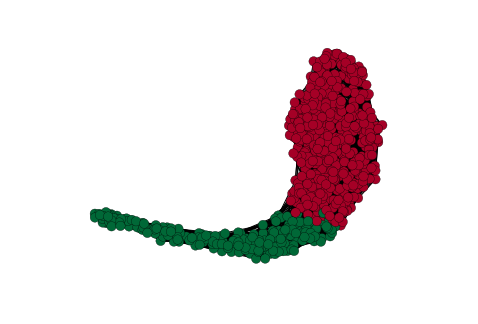

In [50]:
G = nx.from_scipy_sparse_matrix(W)
node_colors= spclus_pred
nx.draw(G, node_size = 90, node_color = spclus_pred, cmap=cm.RdYlGn)

In [51]:
X_sel.T.shape[0]

693

In [52]:
#n = 50
#ncSample = numberClasses.loc[np.random.choice(numberClasses.index, n, replace=False)]

n = X_sel.shape[1]
W = np.zeros((n,n))
print n
print X_sel.shape
print W.shape
sigma = 1.25

for i in range(n):
    for j in range(n):
        W[i,j] = np.exp(-np.sum((X_sel[:,i] - X_sel[:,j])**2)/(2*sigma**2))
        
print W
print X_sel.shape

693
(77, 693)
(693, 693)
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
(77, 693)


In [61]:
X_sel[:,1]
X_sel

array([[  4511.06200917,    974.20539385,   6027.00725969, ...,
          1241.06057821,   7036.82655862,   1543.69789902],
       [  2960.12486879,   1225.50059143,  11586.98252805, ...,
          2078.82910551,  16000.        ,    949.92214046],
       [  3338.55319536,   1268.10512122,  11443.59534753, ...,
          2755.40173537,  16000.        ,   1332.65561209],
       ..., 
       [  3425.79338338,   2484.21560909,   5926.52503012, ...,
          1913.75881651,  12010.35669855,   1756.90896813],
       [  5305.24605334,   3401.97915044,   6379.85568437, ...,
          1045.90570275,   6203.86307659,   1586.93377445],
       [  5037.82382597,   5178.1827837 ,   6683.5325196 , ...,
          1009.53747949,   8561.59758392,   1828.96074221]])

In [54]:
spclus_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0,

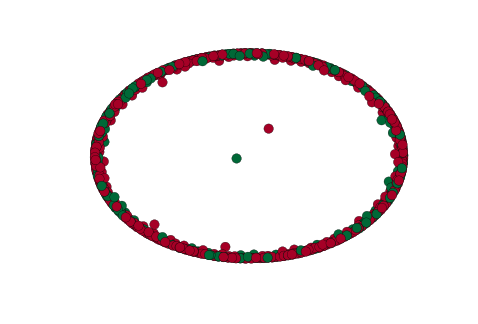

In [55]:
G = nx.Graph(W)
node_colors= spclus_pred
nx.draw(G, node_size = 90, node_color = spclus_pred, cmap=cm.RdYlGn)

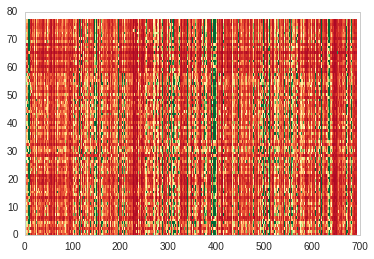

In [56]:
plt.pcolor(X_sel, cmap=cm.RdYlGn)
plt.show()

In [57]:
W[2,1]

0.0

In [58]:
#ax = sns.heatmap(X_sel)

In [59]:
data2.T.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
A28102_at,766.6414,773.8651,1405.578,998.3683,1196.41,877.4896,985.9972,797.388,1325.268,1384.826,...,616.8943,1239.576,964.2183,768.8281,695.5737,715.3347,1469.583,773.4497,1051.386,1002.148
AB000114_at,555.7206,422.7328,600.1598,454.3518,837.2247,849.1001,648.6978,426.6123,672.285,589.2198,...,439.7209,701.499,541.0695,529.5326,413.1007,521.979,864.3235,574.0232,635.0895,699.5374
AB000115_at,691.2145,856.9154,694.4165,761.4268,1037.254,1234.196,1134.589,666.814,995.183,837.5366,...,1386.846,771.303,837.1864,915.5096,624.7364,868.7214,1097.45,683.6391,807.4374,913.208
AB000220_at,541.3077,499.5031,603.8363,430.8263,839.5753,534.4369,670.2772,525.9375,585.6788,601.697,...,636.6647,612.4782,533.5298,459.4197,422.3412,545.2269,877.1493,557.9928,759.4676,606.5059
AB000409_at,1071.147,1011.28,1044.097,1374.274,1494.959,1056.126,1136.099,1077.247,1007.713,937.7144,...,1381.038,899.4838,1253.65,1125.613,1040.631,1241.448,1518.53,1082.058,1288.913,1199.068


In [60]:
data2.T.head()[0]['GI_10047089-S']

KeyError: 'GI_10047089-S'